### Contents

- [Header](#Header)
- [Import Data](#Import-Data)
- [Functions](#Functions)


- [Inspect Data](#Inspect-Data)
- [Filter Data](#Filter-Data)


- [Plot Time Data](#Plot-Time-Data)
- [Plot Altitude Data](#Plot-Altitude-Data)
- [Plot Heartrate Data](#Plot-Heartrate-Data)
- [Plot Speed Data](#Plot-Speed-Data)


- [Create Scatterplots](#Create-Scatterplots)

### Header

In [1]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# html
from IPython.display import Image
from IPython.core.display import HTML

# web
import json

# others
from tqdm import tqdm
import datetime as dt
#import re
#import os

In [2]:
# file paths

raw_path = '../../data/0_raw/fitrec/' 
input_path = '../../data/1_input/fitrec/'
clean_path = '../../data/2_clean/fitrec/' 
preprocess_path = '../../data/3_preprocess/fitrec/' 
output_path = '../../data/4_output/fitrec/'

sports_path = '../../data/1_input/sports/' 

### Import Data

In [3]:
# import clean data

file = 'endomondoHR_proper_dist_spd_summary.csv'
path = clean_path + file

df = pd.read_csv(path)

### Functions

In [4]:
def label_point(x, y, val, ax,fontsize=12):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        plt.text(point['x']+.5, point['y'], str(point['val']),fontsize=fontsize)

### Inspect Data

In [5]:
print(df.shape)
df.head()

(167783, 38)


,id,userId,gender,sport,url,time_start,time_end,time_dur,lat_start,lon_start,...,hr_cardio,hr_peak,spd_avg,spd_min,spd_05,spd_25,spd_75,spd_95,spd_max,impute
0,1,10921915.0,male,bike,https://www.endomondo.com/users/10921915/worko...,1.408899e+09,1.408905e+09,112.133333,60.173349,24.649770,...,0.464444,0.522222,26.152328,6.8652,13.94910,19.90440,31.702500,41.02704,57.459600,0.0
1,2,10921915.0,male,bike,https://www.endomondo.com/users/10921915/worko...,1.408222e+09,1.408226e+09,65.150000,60.173248,24.649855,...,0.591111,0.388889,27.636272,9.0792,15.47802,21.93030,32.455800,43.17102,54.770400,0.0
2,3,10921915.0,male,bike,https://www.endomondo.com/users/10921915/worko...,1.407858e+09,1.407865e+09,100.833333,60.173262,24.649957,...,0.782222,0.160000,26.159896,4.0464,14.41440,20.79090,31.050000,39.83040,59.209200,0.0
3,4,10921915.0,male,bike,https://www.endomondo.com/users/10921915/worko...,1.407432e+09,1.407436e+09,65.633333,60.173286,24.649874,...,0.637778,0.324444,27.135904,4.3272,15.84306,21.39570,31.841100,42.42096,57.985200,0.0
4,5,10921915.0,male,bike (transport),https://www.endomondo.com/users/10921915/worko...,1.406909e+09,1.406911e+09,20.333333,60.173293,24.649798,...,0.080000,0.908889,31.241183,0.0000,18.35280,24.47906,37.426941,46.51405,51.635122,1.0


In [6]:
# Check for nulls in columns

null_cols = df.isnull().sum()
mask_null = null_cols > 0
null_cols[mask_null].sort_values(ascending=False)

Series([], dtype: int64)

In [7]:
df.columns

Index(['id', 'userId', 'gender', 'sport', 'url', 'time_start', 'time_end',
       'time_dur', 'lat_start', 'lon_start', 'lat_end', 'lon_end', 'alt_avg',
       'alt_min', 'alt_05', 'alt_25', 'alt_75', 'alt_95', 'alt_max', 'hr_avg',
       'hr_min', 'hr_05', 'hr_25', 'hr_75', 'hr_95', 'hr_max', 'hr_outof',
       'hr_fatburn', 'hr_cardio', 'hr_peak', 'spd_avg', 'spd_min', 'spd_05',
       'spd_25', 'spd_75', 'spd_95', 'spd_max', 'impute'],
      dtype='object')

In [8]:
df['sport'].value_counts()

bike                       71915
run                        70591
mountain bike              10722
bike (transport)            7757
indoor cycling              1725
walk                        1289
orienteering                 867
cross-country skiing         789
core stability training      448
fitness walking              292
skate                        271
roller skiing                238
hiking                       237
kayaking                      92
circuit training              89
weight training               74
rowing                        71
gymnastics                    66
soccer                        51
downhill skiing               48
treadmill running             28
snowshoeing                   16
swimming                      14
golf                          12
badminton                     10
elliptical                    10
horseback riding              10
tennis                         8
basketball                     8
aerobics                       7
climbing  

In [9]:
cols = ['time_dur',
        'alt_avg', 'alt_min','alt_05', 'alt_25', 'alt_75', 'alt_95', 'alt_max',
        'hr_avg', 'hr_min','hr_05', 'hr_25', 'hr_75', 'hr_95', 'hr_max',
        'hr_outof', 'hr_fatburn','hr_cardio', 'hr_peak',
        'spd_avg', 'spd_min', 'spd_05', 'spd_25','spd_75', 'spd_95', 'spd_max']

df_avg = df.groupby('sport')[cols].mean()
df_avg

,time_dur,alt_avg,alt_min,alt_05,alt_25,alt_75,alt_95,alt_max,hr_avg,hr_min,...,hr_fatburn,hr_cardio,hr_peak,spd_avg,spd_min,spd_05,spd_25,spd_75,spd_95,spd_max
sport,,,,,,,,,,,,,,,,,,,,,
aerobics,57.709524,44.640000,31.571429,36.911429,41.978571,46.971429,53.062857,63.857143,148.031746,85.571429,...,0.145714,0.439048,0.386032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
badminton,60.571667,226.091911,179.700000,206.778000,221.095000,235.515000,240.871000,244.960000,139.914000,104.700000,...,0.214222,0.505778,0.278889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
basketball,64.643750,43.218556,40.775000,42.675000,43.075000,43.450000,43.900000,44.875000,125.949167,70.750000,...,0.313056,0.447778,0.139167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bike,160.284924,128.428054,88.892226,95.685168,109.473551,145.586072,169.726660,181.411895,133.504620,86.160968,...,0.291335,0.477958,0.200835,25.294839,1.355143,12.717327,20.944006,29.938877,36.800805,50.396540
bike (transport),54.081847,223.079464,197.930313,203.035176,211.373795,234.018699,249.949807,258.902085,126.806391,79.900090,...,0.360026,0.478962,0.109177,23.415432,0.575061,9.471590,20.026193,27.673933,33.378497,53.448621
circuit training,57.223783,72.755865,57.768539,64.178315,68.428090,77.957865,84.648202,95.716854,121.087516,81.370787,...,0.407091,0.334107,0.122197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
climbing,133.706667,855.362844,579.640000,622.086000,738.060000,971.760000,1060.992000,1078.000000,134.707111,89.600000,...,0.336444,0.404000,0.241778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
core stability training,69.325149,285.244746,246.880117,261.947636,274.486949,296.487315,308.639167,316.230197,129.357188,85.892857,...,0.332153,0.326518,0.245833,0.737856,0.134301,0.444033,0.589146,0.863413,1.093870,1.839833
cross-country skiing,96.753253,507.111475,438.549852,453.504925,483.325586,531.767120,557.165814,569.212950,137.932241,87.812421,...,0.254680,0.452655,0.274192,11.723866,0.064677,4.487988,8.448977,14.129511,21.526865,35.131429


In [10]:
cols = ['time_dur',
        'alt_avg', 'alt_min','alt_05', 'alt_25', 'alt_75', 'alt_95', 'alt_max',
        'hr_avg', 'hr_min','hr_05', 'hr_25', 'hr_75', 'hr_95', 'hr_max',
        'hr_outof', 'hr_fatburn','hr_cardio', 'hr_peak',
        'spd_avg', 'spd_min', 'spd_05', 'spd_25','spd_75', 'spd_95', 'spd_max']

df_min = df.groupby('sport')[cols].min()
df_min

,time_dur,alt_avg,alt_min,alt_05,alt_25,alt_75,alt_95,alt_max,hr_avg,hr_min,...,hr_fatburn,hr_cardio,hr_peak,spd_avg,spd_min,spd_05,spd_25,spd_75,spd_95,spd_max
sport,,,,,,,,,,,,,,,,,,,,,
aerobics,23.366667,0.000000,-28.600,0.000,0.00000,0.00000,0.00000,0.000000,132.002222,67.0,...,0.006667,0.115556,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
badminton,34.466667,87.916444,-80.600,61.060,88.05000,101.40000,102.11000,105.000000,113.660000,86.0,...,0.000000,0.157778,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
basketball,29.133333,32.402222,31.000,32.000,32.00000,33.00000,34.00000,36.000000,101.188889,59.0,...,0.197778,0.068889,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
bike,7.483333,-9999.000000,-9999.000,-9999.000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,0.000000,-1320.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
bike (transport),7.833333,-161.005960,-500.000,-395.550,-189.42775,-142.96400,-106.39560,-89.000000,0.000000,-865.0,...,0.000000,0.000000,0.000000,0.294899,0.0,0.000000,0.000000,0.000000,0.443586,5.751012
circuit training,14.416667,-10.562222,-89.800,-15.840,-12.60000,-8.60000,-1.60000,1.000000,74.622222,43.0,...,0.015556,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
climbing,93.166667,179.733778,145.000,150.400,168.45000,186.20000,190.62000,203.600000,122.000000,80.0,...,0.060000,0.286667,0.048889,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
core stability training,7.483333,-2.929780,-2611.460,-20.310,-8.60000,-1.60001,-1.60001,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
cross-country skiing,16.583333,-9.638222,-269.200,-63.600,-22.20000,-7.60000,-5.60000,-0.343384,0.000000,0.0,...,0.000000,0.000000,0.000000,1.917140,0.0,0.000000,0.000000,2.012688,4.764760,8.497051


### Filter Data

In [11]:
# remove rows with abnormal heartrate

print(len(df))

cond_1 = df['hr_min'] > 40
cond_2 = df['hr_avg'] > 50
cond_3 = df['hr_max'] > 60

df = df[cond_1 & cond_2 & cond_3]

print(len(df))

167783
167017


In [12]:
# remove rows with abnormal workout duration

print(len(df))

# time_dur in minutes
time_dur_mask = df['time_dur'] < 24 * 60
df = df[time_dur_mask]

print(len(df))

167017
167013


### Plot Time Data

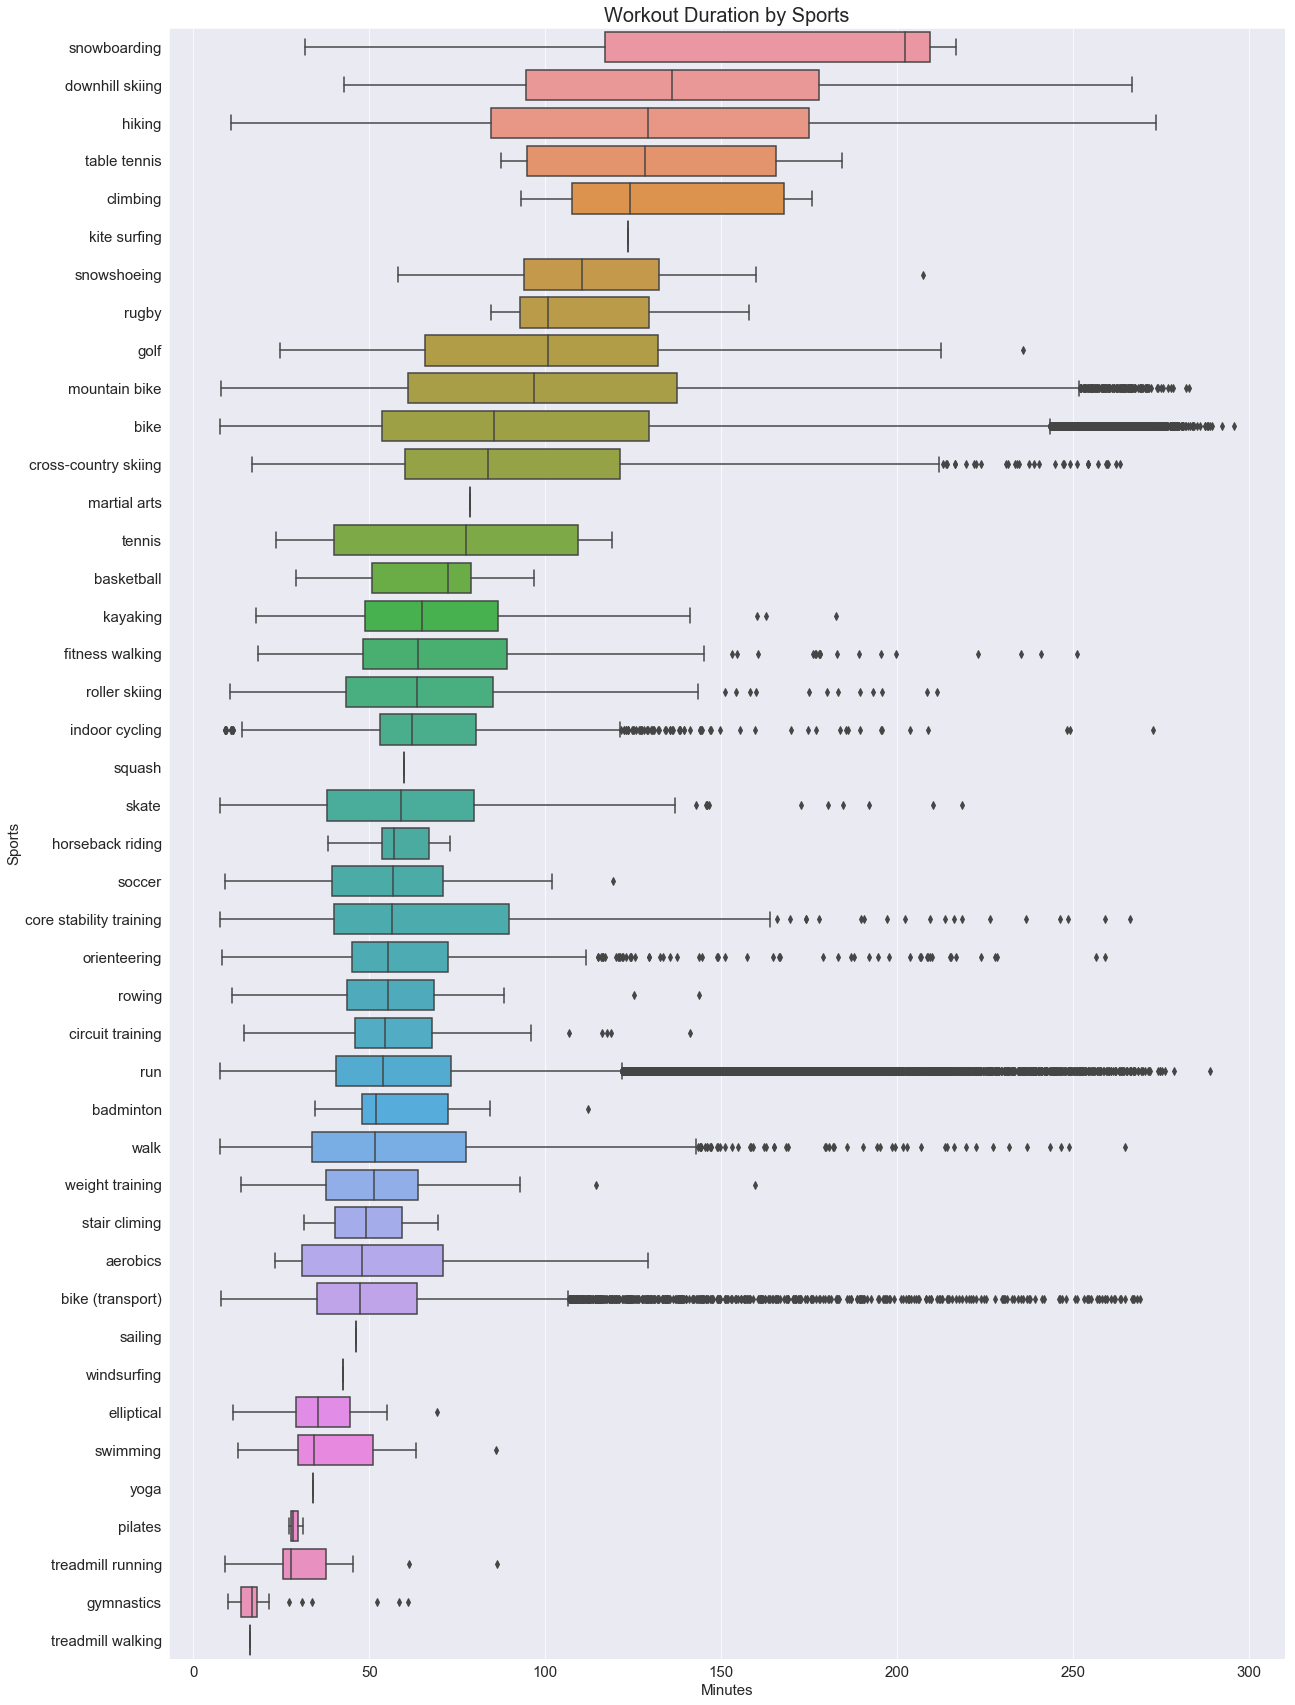

In [13]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['time_dur'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='time_dur',y='sport',order=order);

plt.title('Workout Duration by Sports',fontsize=20)
plt.xlabel('Minutes',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

### Plot Altitude Data

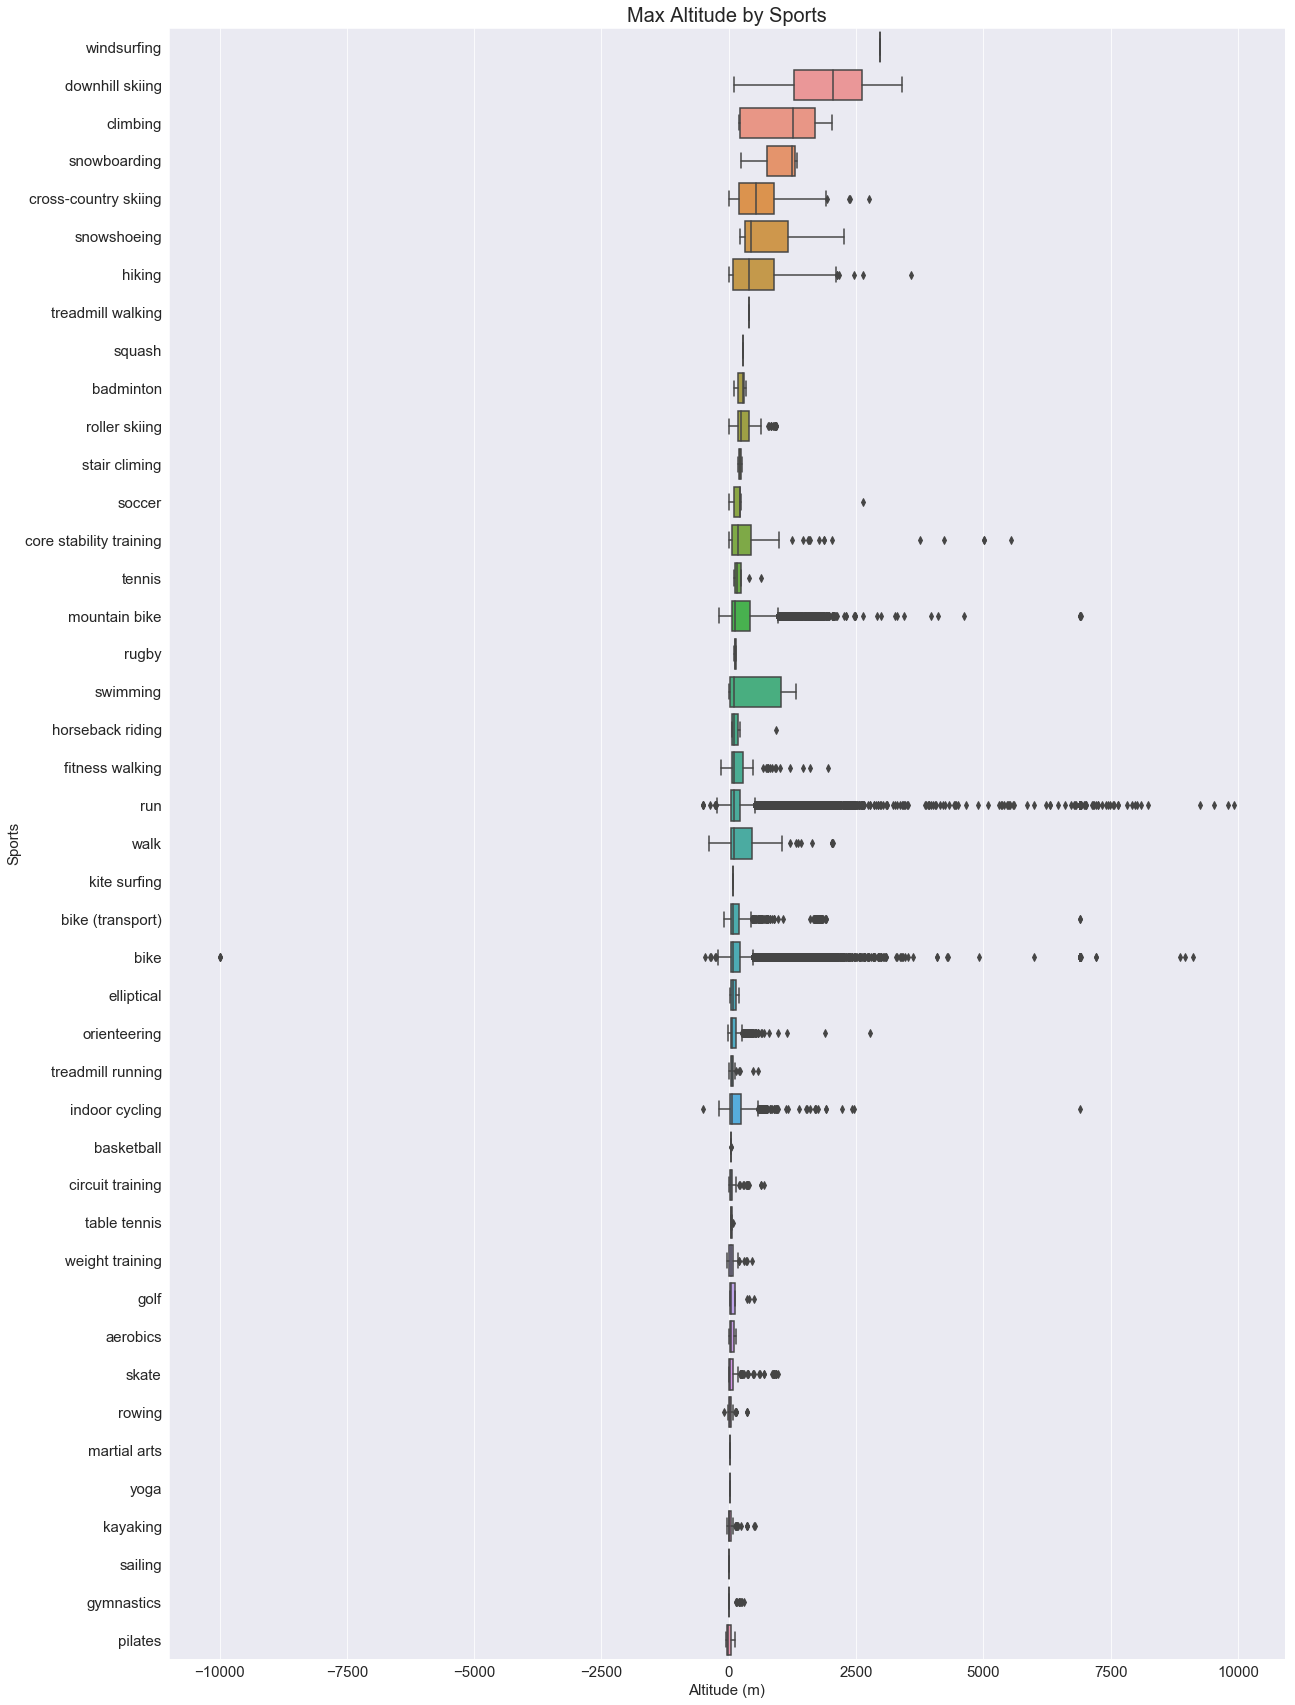

In [14]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['alt_max'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='alt_max',y='sport',order=order);

plt.title('Max Altitude by Sports',fontsize=20)
plt.xlabel('Altitude (m)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

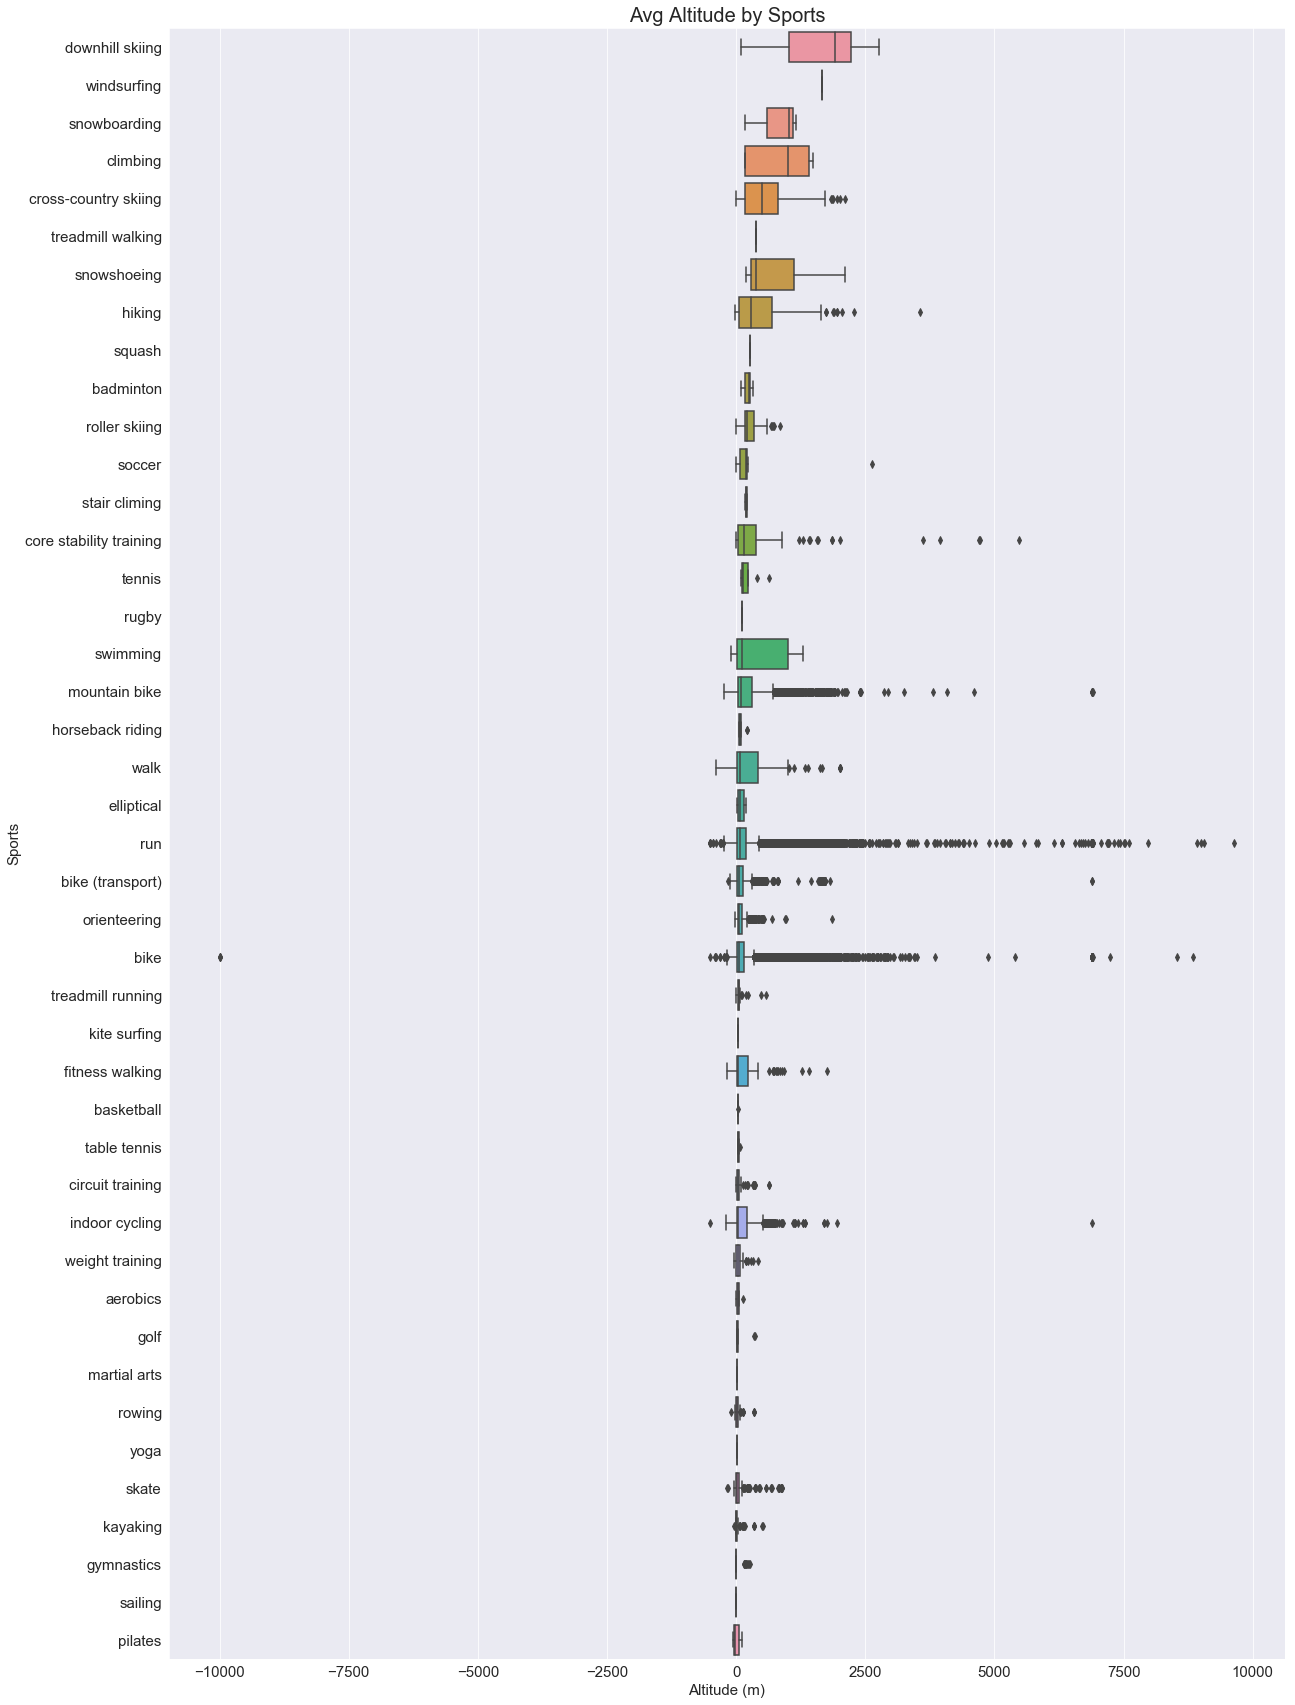

In [15]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['alt_avg'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='alt_avg',y='sport',order=order);

plt.title('Avg Altitude by Sports',fontsize=20)
plt.xlabel('Altitude (m)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

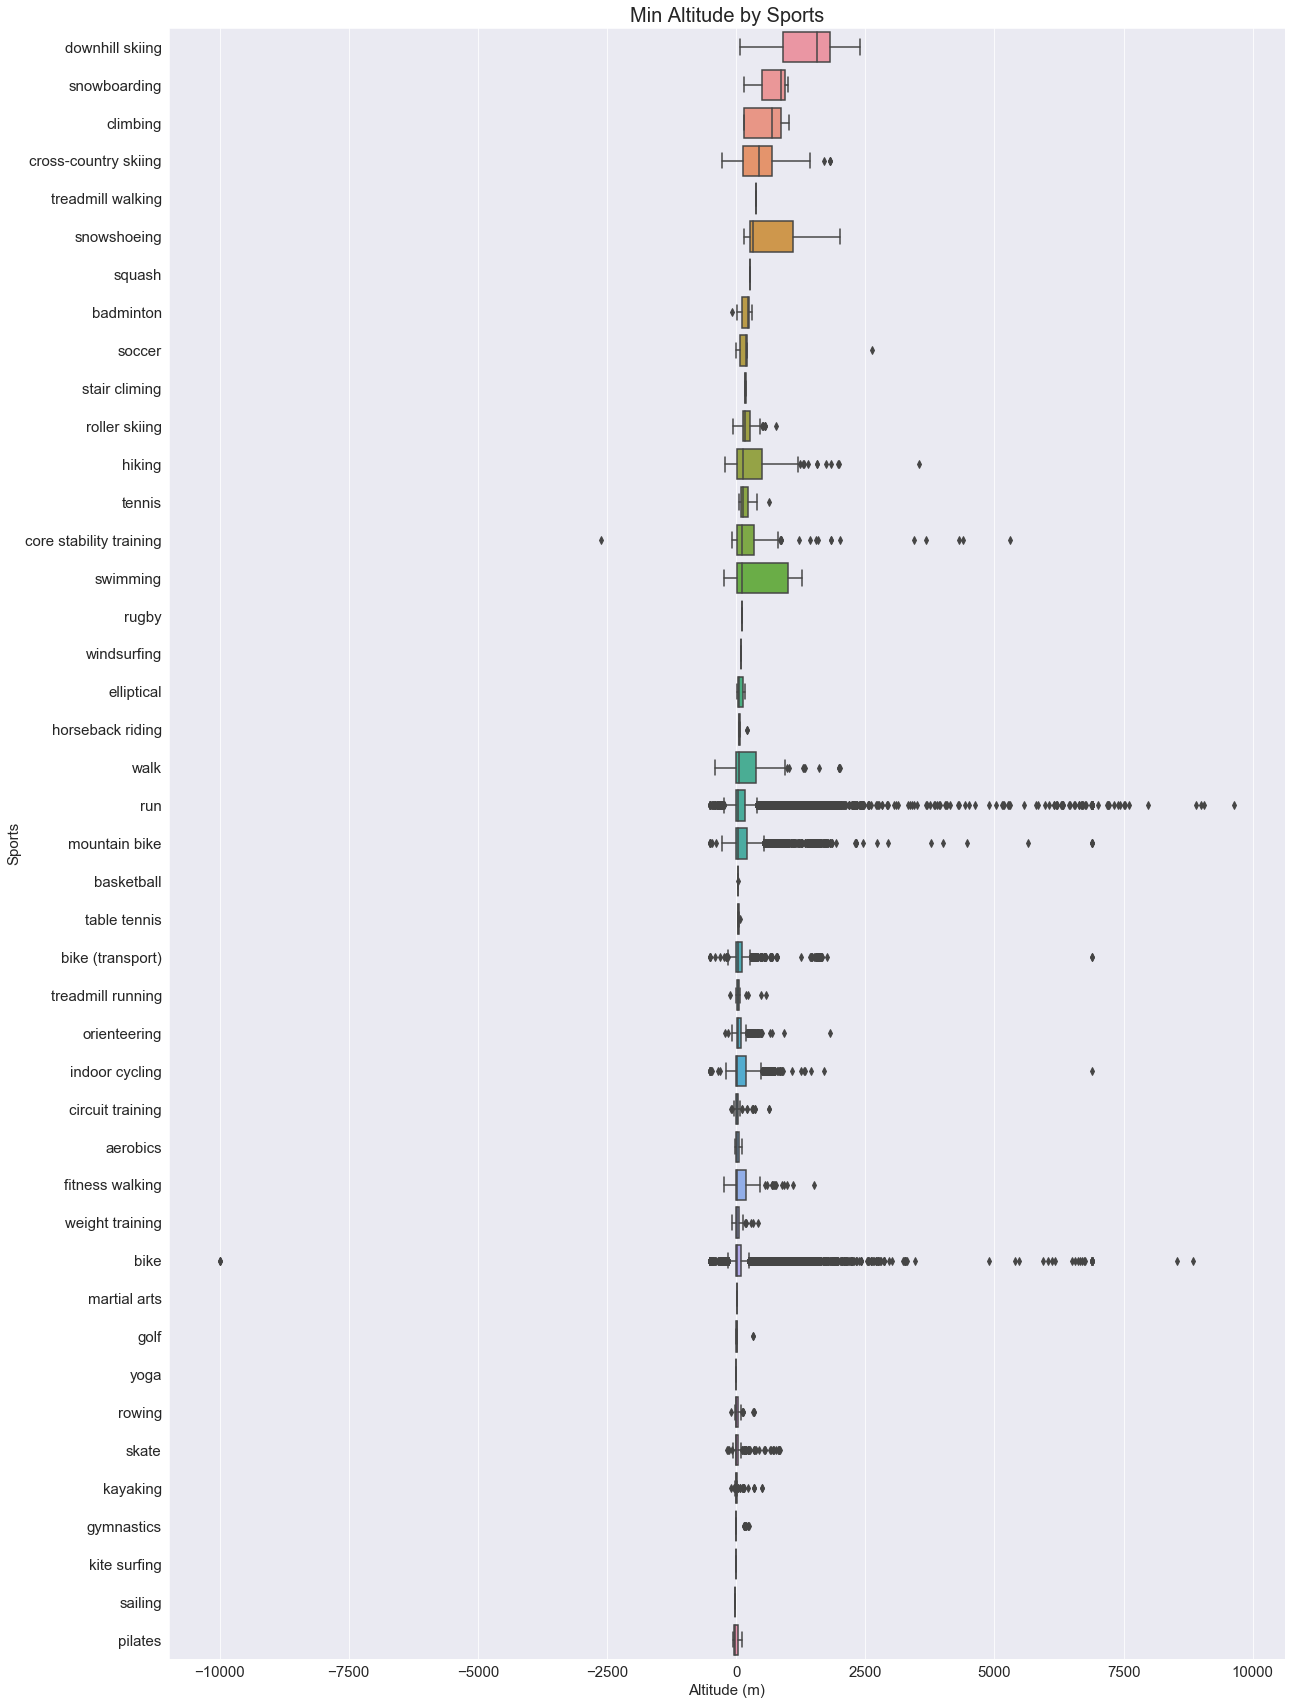

In [16]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['alt_min'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='alt_min',y='sport',order=order);

plt.title('Min Altitude by Sports',fontsize=20)
plt.xlabel('Altitude (m)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

### Plot Heartrate Data

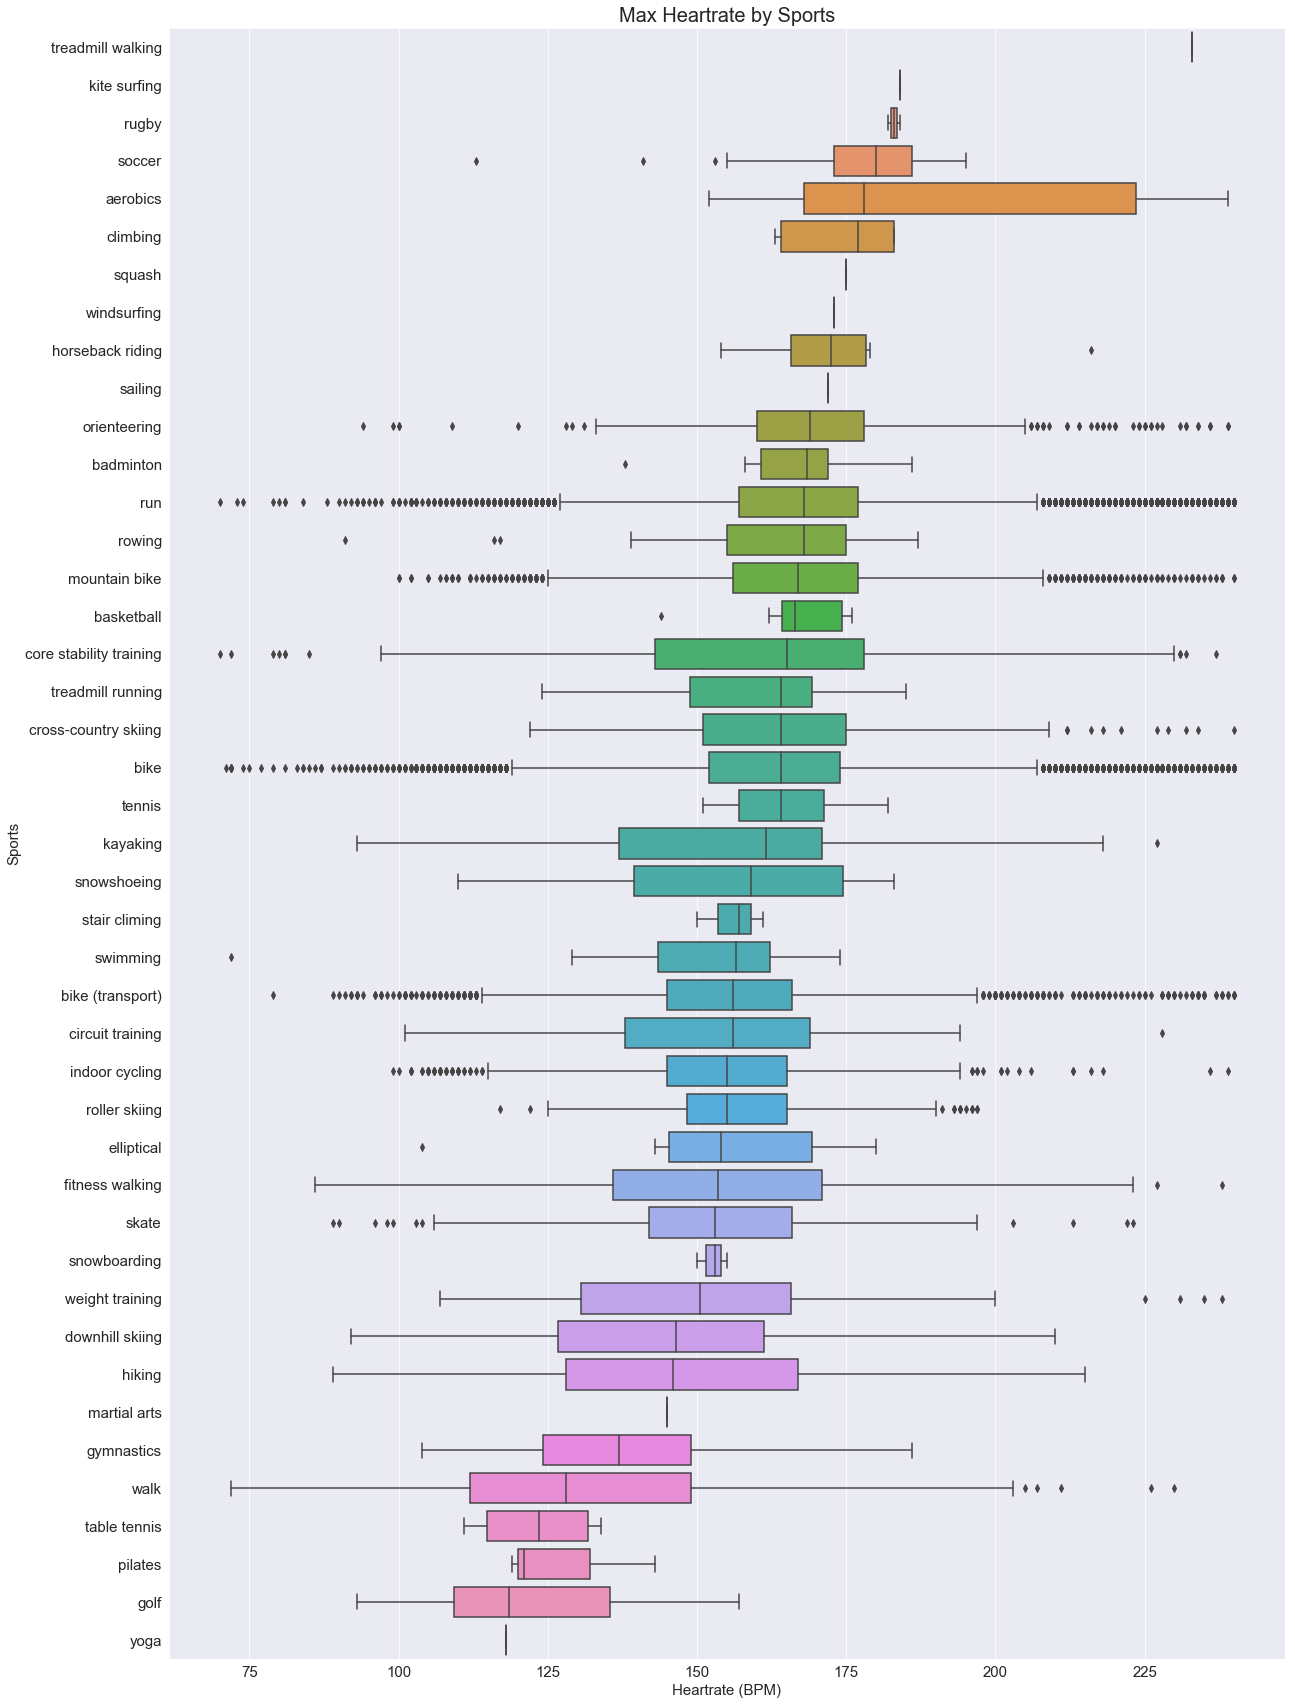

In [17]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['hr_max'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='hr_max',y='sport',order=order);

plt.title('Max Heartrate by Sports',fontsize=20)
plt.xlabel('Heartrate (BPM)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

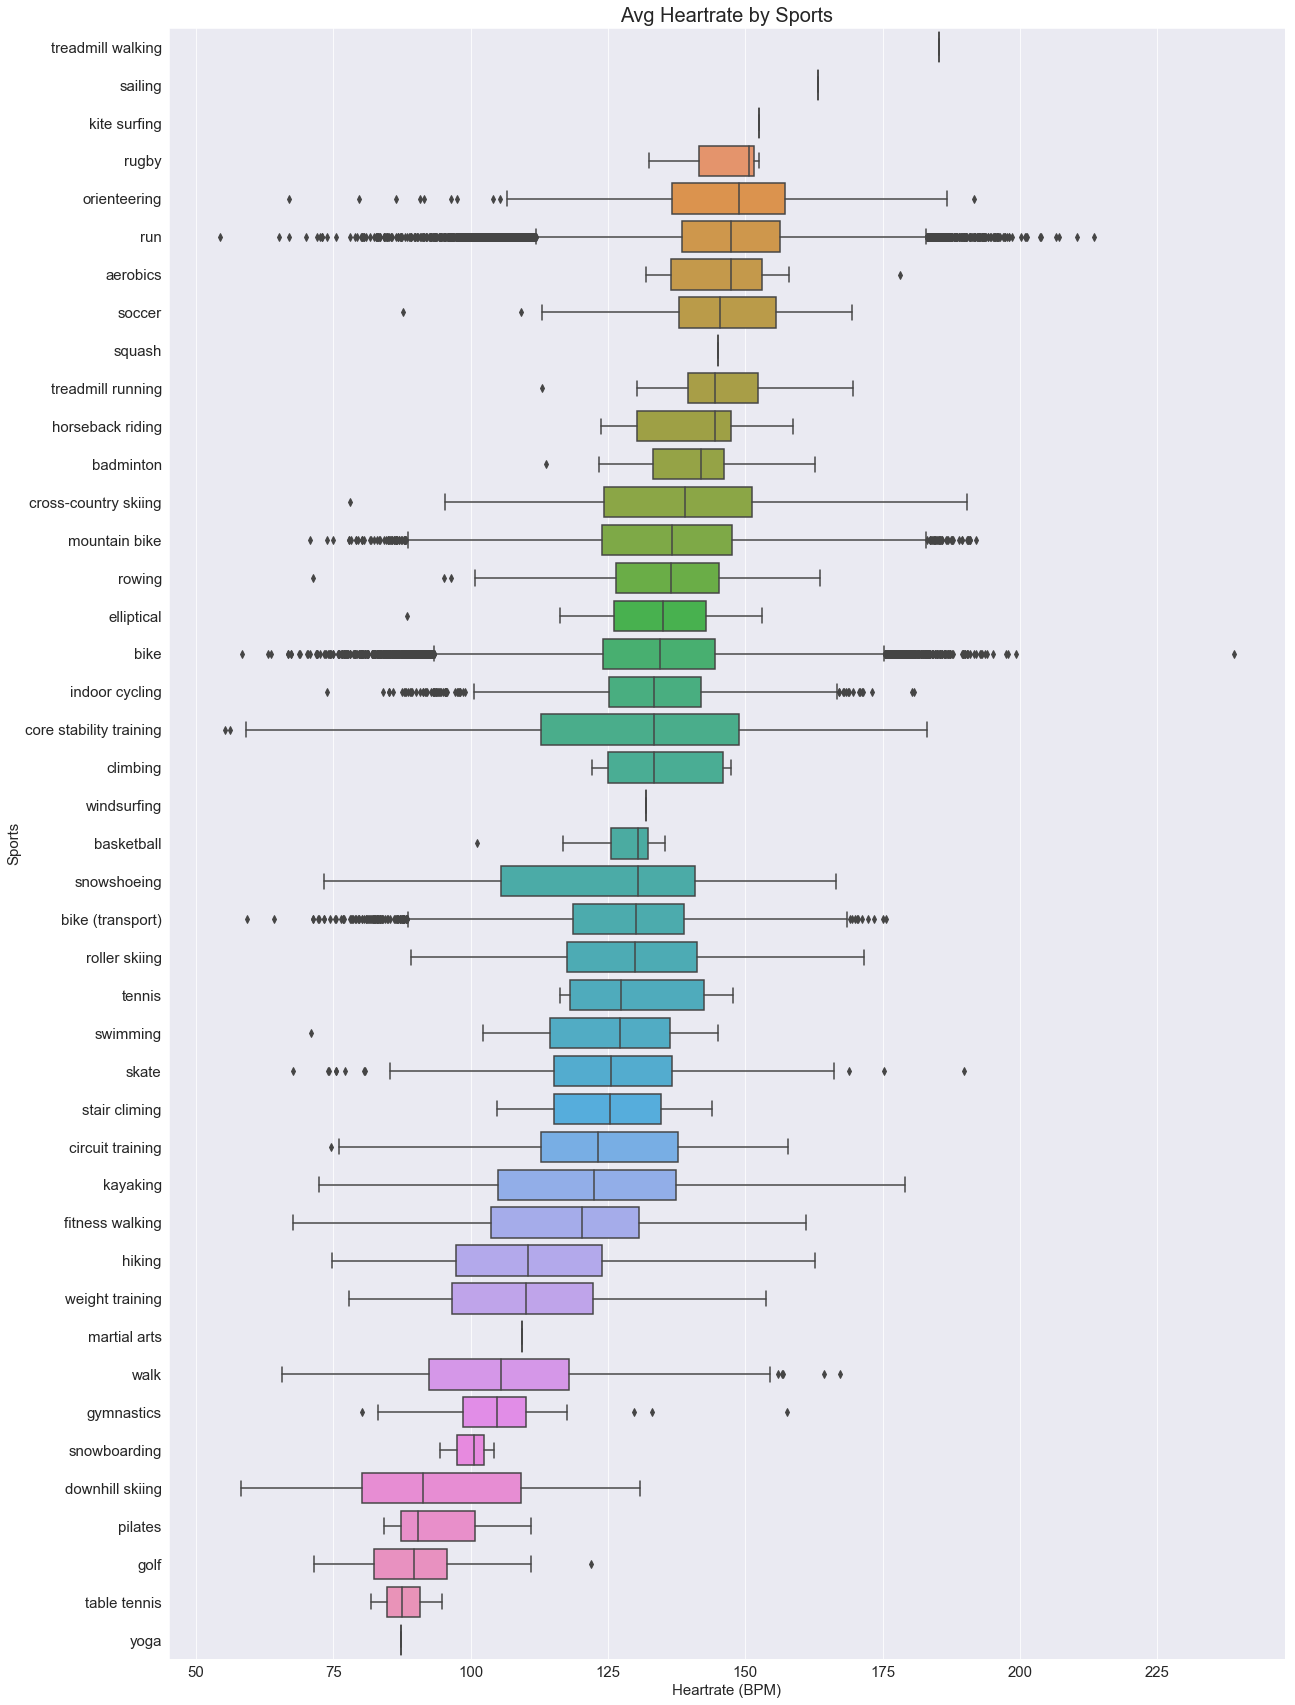

In [18]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['hr_avg'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='hr_avg',y='sport',order=order);

plt.title('Avg Heartrate by Sports',fontsize=20)
plt.xlabel('Heartrate (BPM)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

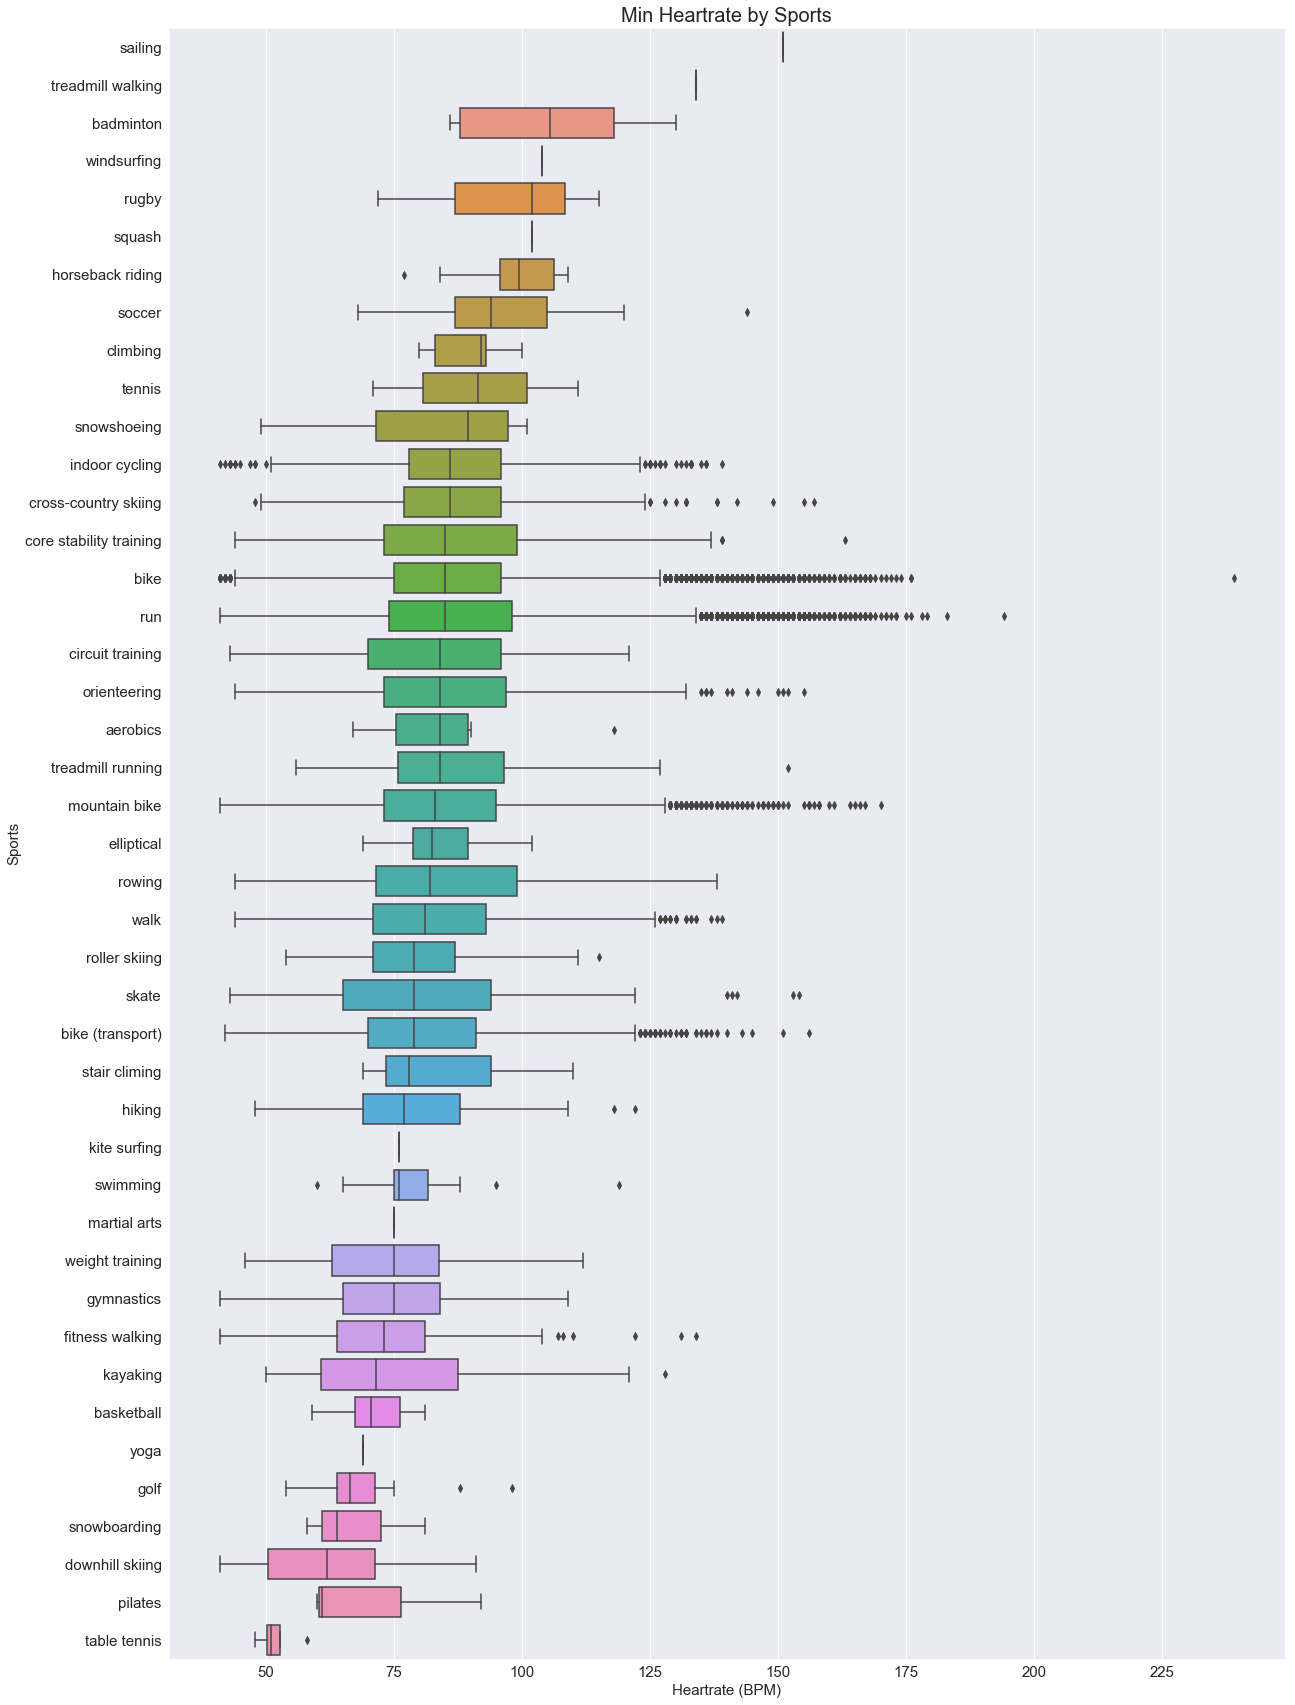

In [19]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['hr_min'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='hr_min',y='sport',order=order);

plt.title('Min Heartrate by Sports',fontsize=20)
plt.xlabel('Heartrate (BPM)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

### Plot Speed Data

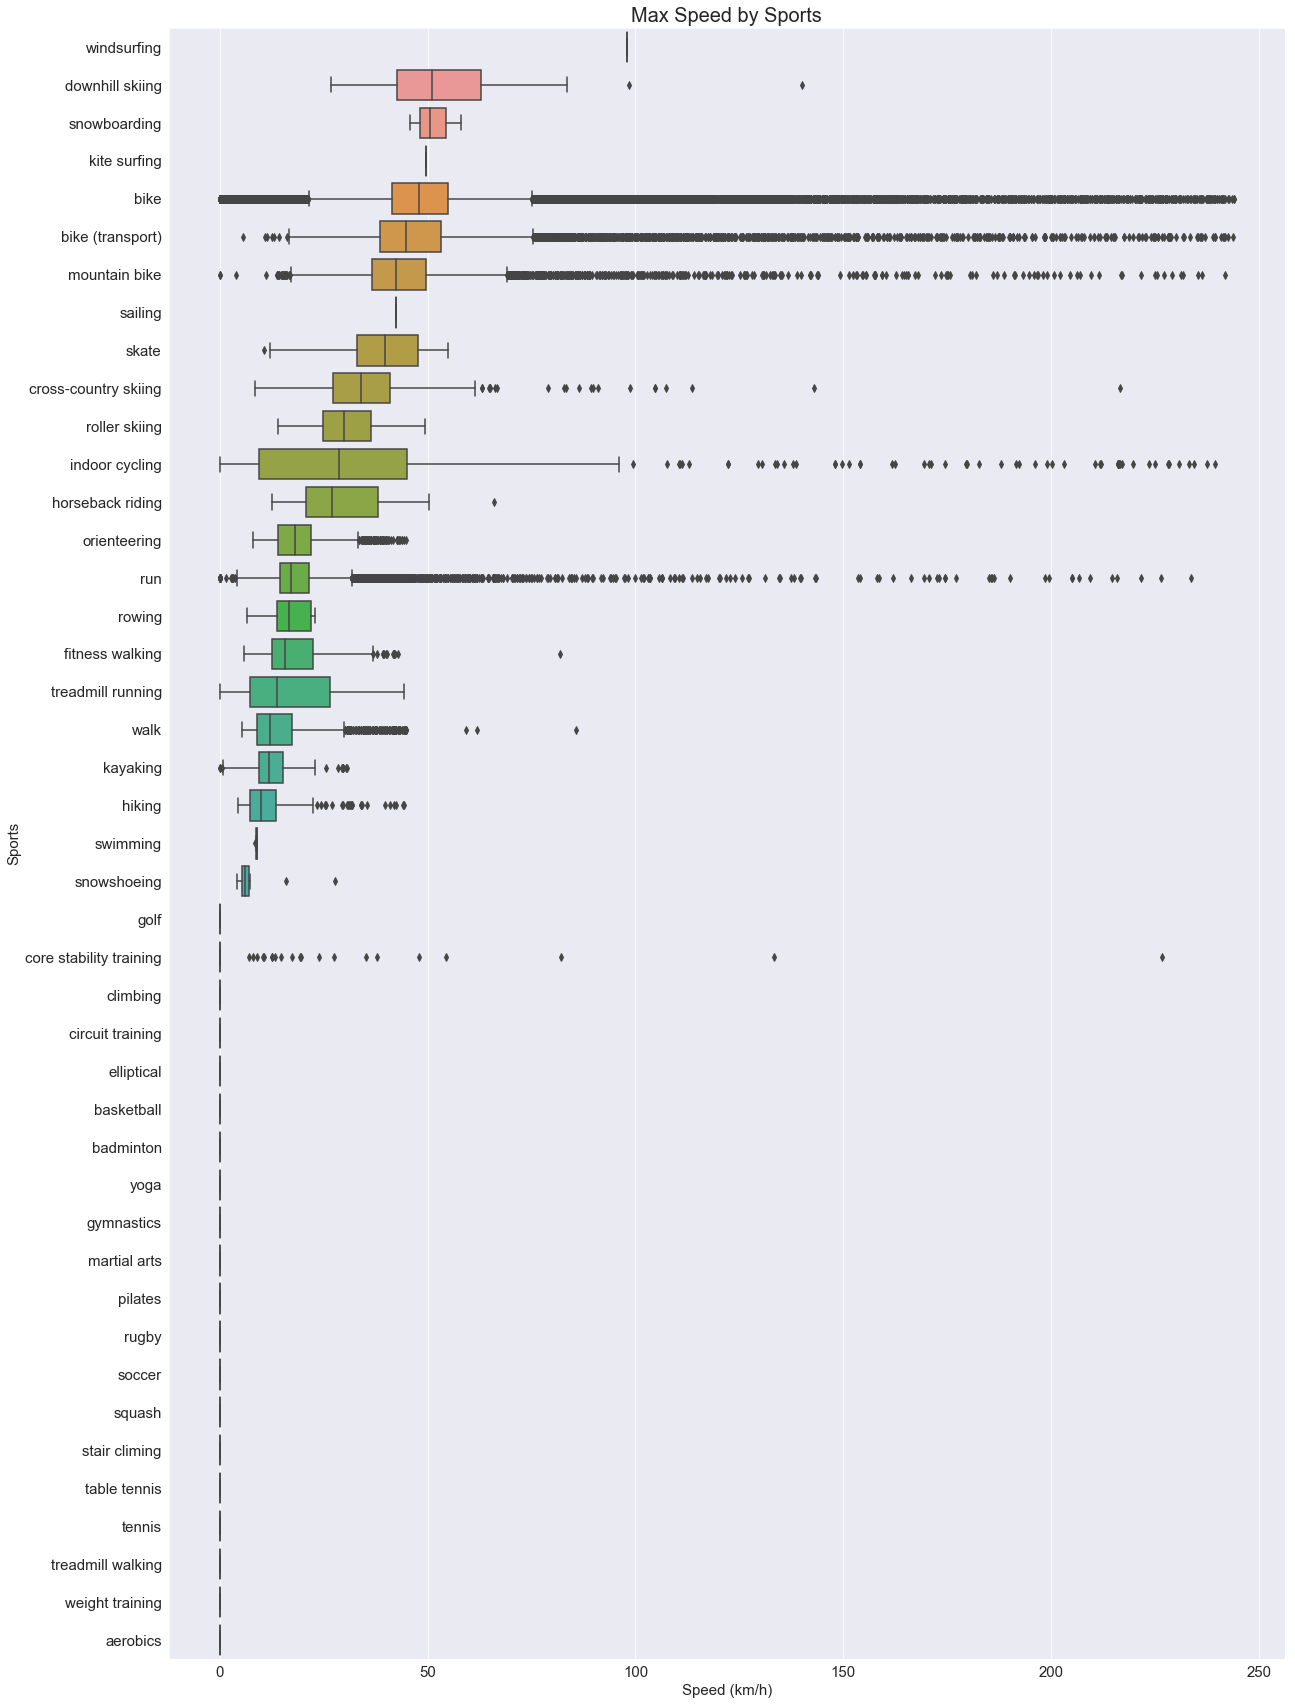

In [20]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['spd_max'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='spd_max',y='sport',order=order);

plt.title('Max Speed by Sports',fontsize=20)
plt.xlabel('Speed (km/h)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

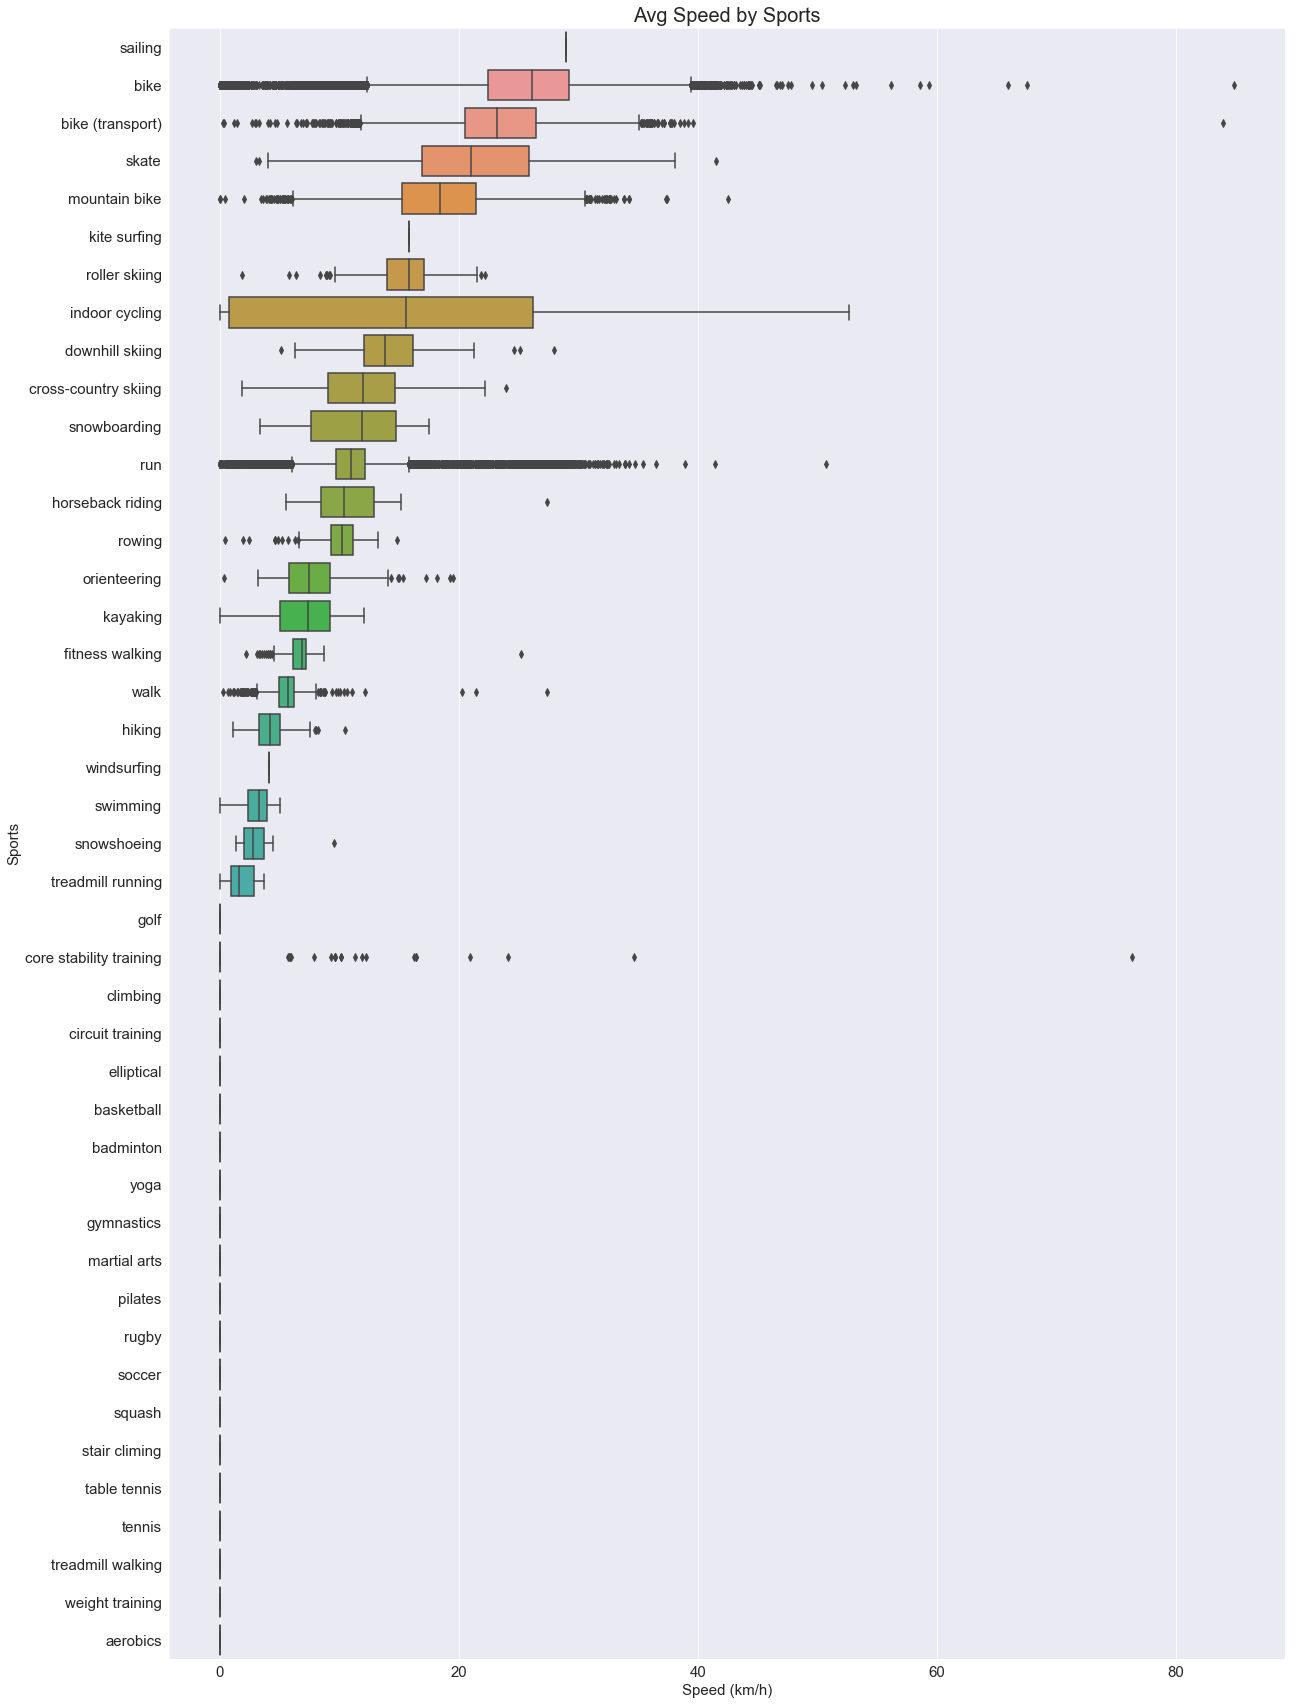

In [21]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['spd_avg'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='spd_avg',y='sport',order=order);

plt.title('Avg Speed by Sports',fontsize=20)
plt.xlabel('Speed (km/h)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

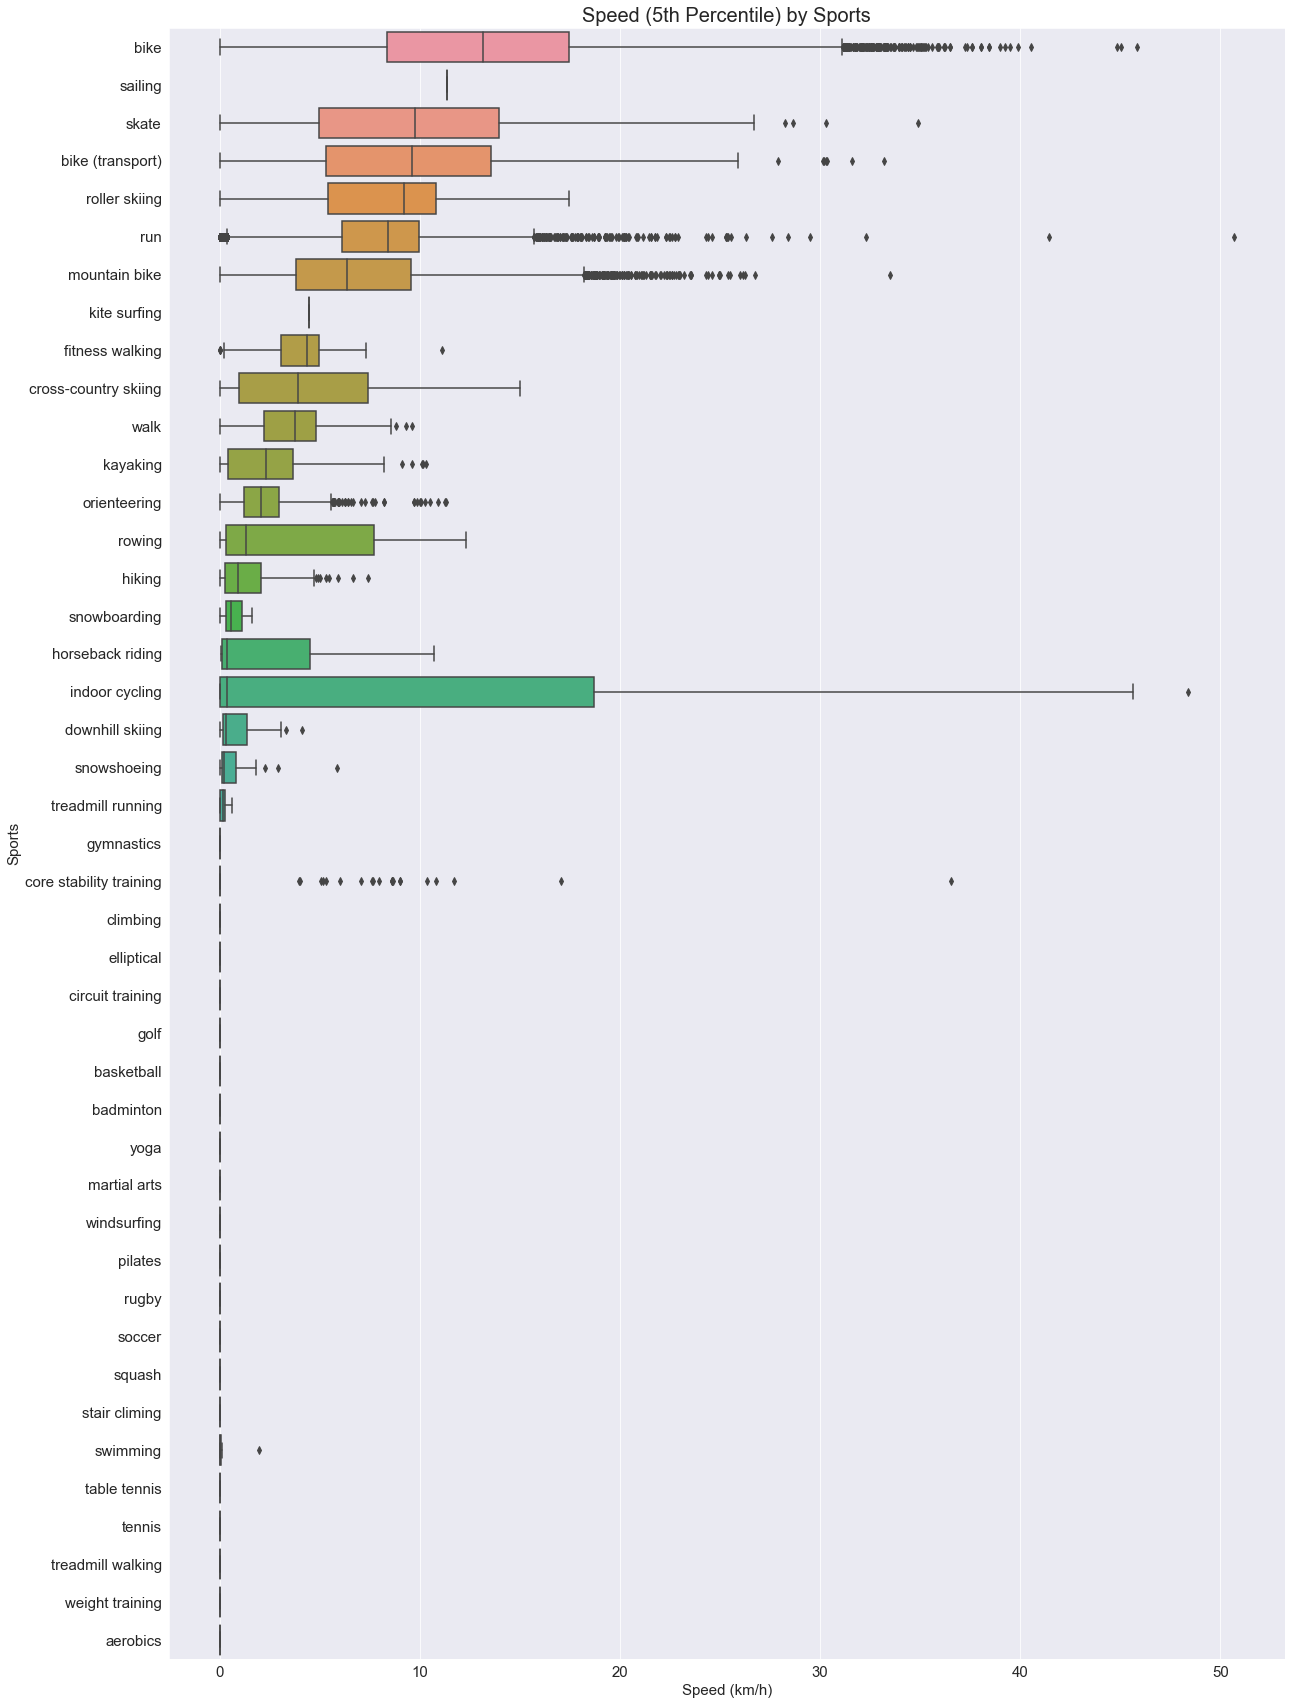

In [22]:
plt.figure(figsize=(20,30))

order = df.groupby('sport')['spd_05'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='spd_05',y='sport',order=order);

plt.title('Speed (5th Percentile) by Sports',fontsize=20)
plt.xlabel('Speed (km/h)',fontsize=15);
plt.ylabel('Sports',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

### Create Scatterplots

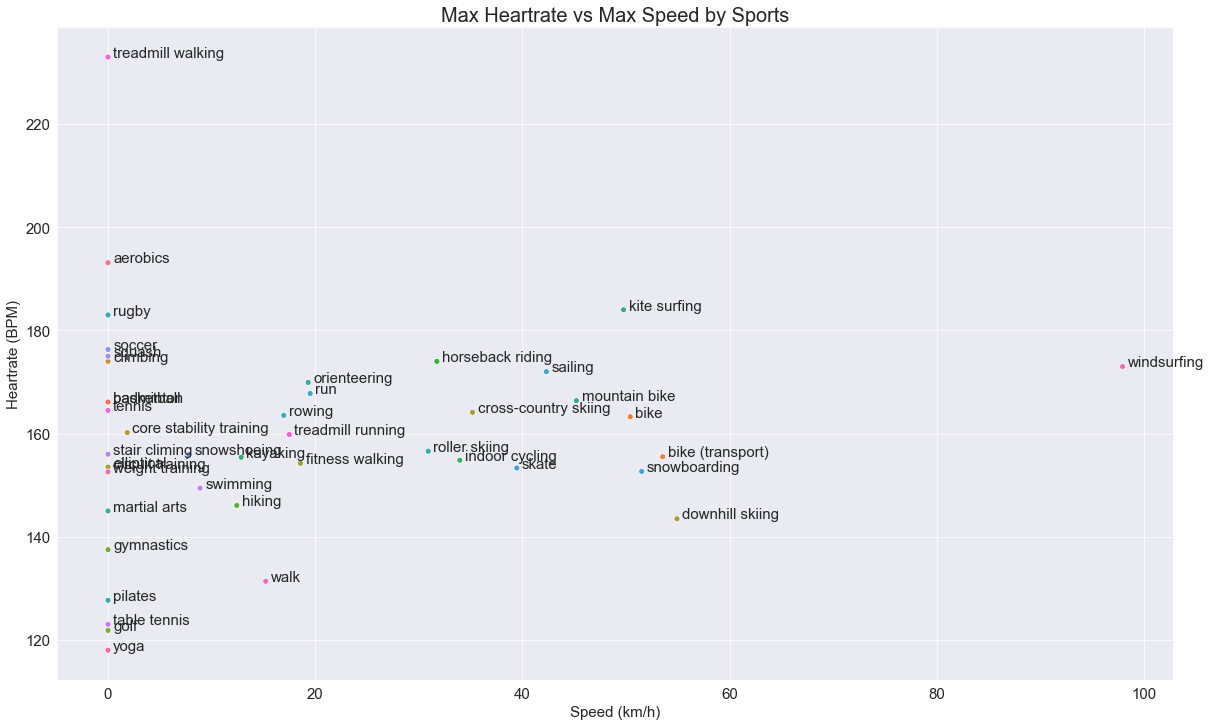

In [23]:
# create df using groupby
df_sp = df.groupby('sport')['spd_max','hr_max'].mean()
df_sp.reset_index(inplace=True)
df_sp

# create plot
plt.figure(figsize=(20,12))
sns.scatterplot(data=df_sp,x='spd_max',y='hr_max',hue='sport');

plt.title('Max Heartrate vs Max Speed by Sports',fontsize=20)
plt.xlabel('Speed (km/h)',fontsize=15);
plt.ylabel('Heartrate (BPM)',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend().remove()

label_point(df_sp['spd_max'], df_sp['hr_max'], df_sp['sport'], plt.gca(),15)

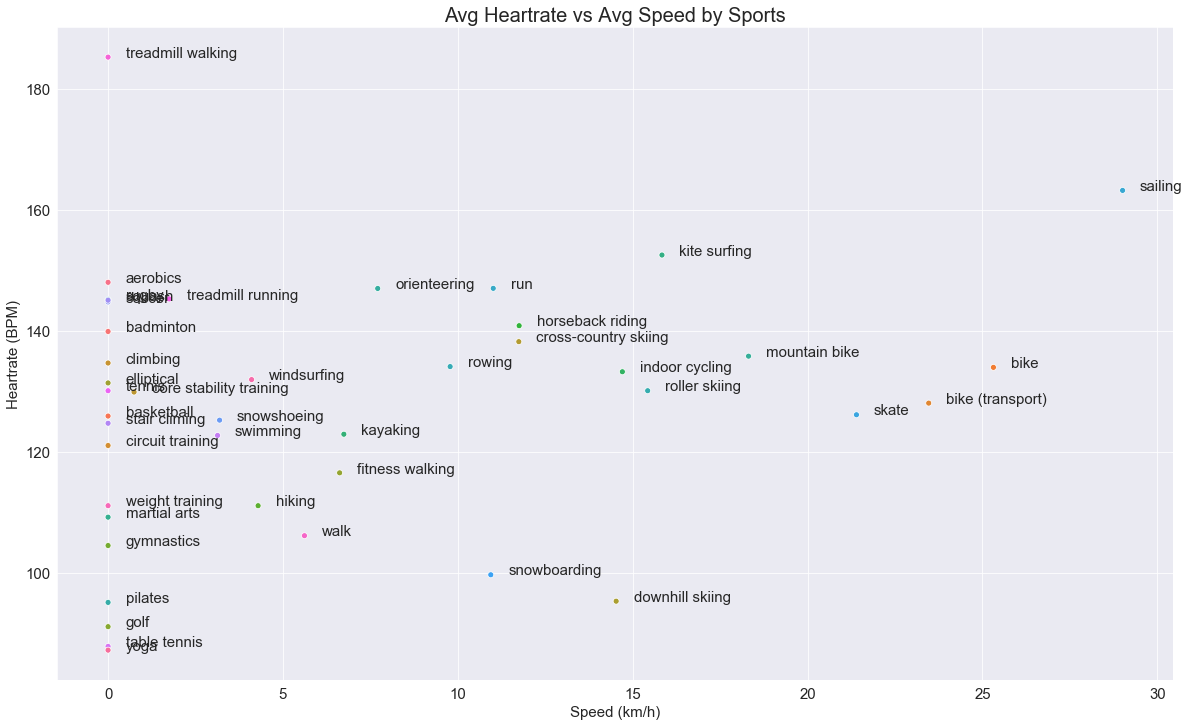

In [24]:
# create df using groupby
df_sp = df.groupby('sport')['spd_avg','hr_avg'].mean()
df_sp.reset_index(inplace=True)
df_sp

# create plot
plt.figure(figsize=(20,12))
sns.scatterplot(data=df_sp,x='spd_avg',y='hr_avg',hue='sport');

plt.title('Avg Heartrate vs Avg Speed by Sports',fontsize=20)
plt.xlabel('Speed (km/h)',fontsize=15);
plt.ylabel('Heartrate (BPM)',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend().remove()

label_point(df_sp['spd_avg'], df_sp['hr_avg'], df_sp['sport'], plt.gca(),15)

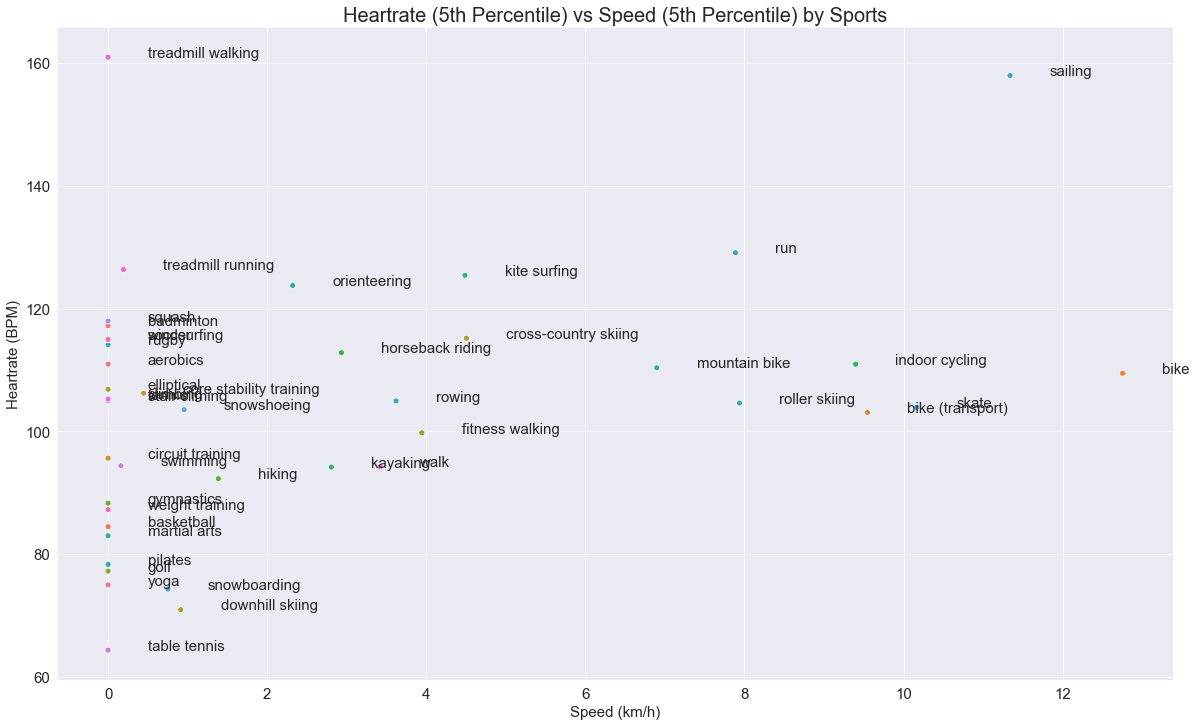

In [25]:
# create df using groupby
df_sp = df.groupby('sport')['spd_05','hr_05'].mean()
df_sp.reset_index(inplace=True)
df_sp

# create plot
plt.figure(figsize=(20,12))
sns.scatterplot(data=df_sp,x='spd_05',y='hr_05',hue='sport');

plt.title('Heartrate (5th Percentile) vs Speed (5th Percentile) by Sports',fontsize=20)
plt.xlabel('Speed (km/h)',fontsize=15);
plt.ylabel('Heartrate (BPM)',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend().remove()

label_point(df_sp['spd_05'], df_sp['hr_05'], df_sp['sport'], plt.gca(),15)